# __WEATHER__ 


## Assignment 2 - PFDA

### Author: E. Qejvani

##### About the assignment:

-- In this assignment we are reading a .csv file 'weatherreading1.csv, found in the 'data-files' directory.
-- Create a nice plot of the temperature overtime.

In [266]:
# importing libraries to use in this notebook
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates # This is used to format the time in x axis in a clean and easy to read format.

First lets read the csv file stored in data-files folder and upload it in our notebook.

In [267]:
df = pd.read_csv('data-files/weatherreadings1.csv')

Displaying information about the csv file

In [268]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 35 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   siteId                          89 non-null     object 
 1   reportStartDateTime             89 non-null     object 
 2   reportEndDateTime               89 non-null     object 
 3   collectionName                  89 non-null     int64  
 4   isPublic                        89 non-null     bool   
 5   isLatestVersion                 89 non-null     bool   
 6   observationType                 89 non-null     int64  
 7   softwareType                    89 non-null     object 
 8   windDirection                   89 non-null     int64  
 9   relativeHumidity                89 non-null     float64
 10  windSpeed_MilePerHour           89 non-null     float64
 11  windSpeed_MetrePerSecond        89 non-null     float64
 12  dryBulbTemperature_Fahrenheit   89 non

In [269]:
# Displaying the first five rows of the dataset.
df.head()

,siteId,reportStartDateTime,reportEndDateTime,collectionName,isPublic,isLatestVersion,observationType,softwareType,windDirection,relativeHumidity,...,isDcnn,longitude,latitude,height,id,localReportEndDateTime,externalSiteId,createdDateTime,version,externalId
0,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T16:15:00+00:00,2024-10-02T16:15:00+00:00,1,True,True,1,WeatherLink,322,70.4,...,False,-8.8545,53.5244,45,20241002oarq1xwy5re69kyhyyguw31uhh,2024-10-02T16:15:00+00:00,1000013318,2024-10-02T16:15:28.5671119+00:00,1,12577570561
1,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T16:45:00+00:00,2024-10-02T16:45:00+00:00,1,True,True,1,WeatherLink,327,72.4,...,False,-8.8545,53.5244,45,20241002zafpyewy5we69kyhyytrtenn4a,2024-10-02T16:45:00+00:00,1000013318,2024-10-02T16:45:40.4251616+00:00,1,12577595550
2,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T17:00:00+00:00,2024-10-02T17:00:00+00:00,1,True,True,1,WeatherLink,27,73.4,...,False,-8.8545,53.5244,45,202410027k7rmycy5he69kyhyytrtenn4a,2024-10-02T17:00:00+00:00,1000013318,2024-10-02T17:01:12.3376405+00:00,1,12577608947
3,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T17:15:00+00:00,2024-10-02T17:15:00+00:00,1,True,True,1,WeatherLink,38,74.9,...,False,-8.8545,53.5244,45,20241002h49q6thyhre69kyhyytrtenn4a,2024-10-02T17:15:00+00:00,1000013318,2024-10-02T17:15:22.2638326+00:00,1,12577622149
4,f2d42aea-f516-ec11-b76a-0003ff599499,2024-10-02T17:30:00+00:00,2024-10-02T17:30:00+00:00,1,True,True,1,WeatherLink,0,77.0,...,False,-8.8545,53.5244,45,20241002977ft1hyhce69kyhyytrtenn4a,2024-10-02T17:30:00+00:00,1000013318,2024-10-02T17:30:29.3915476+00:00,1,12577636922


### Collecting the data required for our plotting.
_We need to work with the csv file we have to take out from it only data we need for our project which are: date, time and temperature._

_I'm going to convert date and temperature in easier readable format and change the column heading_

_I also will divide the date column into two columns: one for the date and the other for the time._

In [270]:
# Convert data to a readable format and change column heading to 'date' and 'time'.
df["date_format"] = pd.to_datetime(df["reportStartDateTime"])
df["date"] = df["date_format"].dt.strftime('%Y/%m/%d')
df["time"] = df["date_format"].dt.strftime('%H:%M')

# Rename temperature heading from 'dryBulbTemperature_Celsius' to 'temp' and round it up to 2 decimal places.
df["temp"] = df["dryBulbTemperature_Celsius"].round(2)


##### _create a new dataset 'weather_info', which will store the 3 new columns we need_ 

In [271]:
# create a subset of df storing the data we are interested in.
weather_info = df[["date","time", "temp"]]
weather_info


,date,time,temp
0,2024/10/02,16:15,15.94
1,2024/10/02,16:45,15.78
2,2024/10/02,17:00,15.11
3,2024/10/02,17:15,14.28
4,2024/10/02,17:30,13.67
...,...,...,...
84,2024/10/03,14:00,14.61
85,2024/10/03,14:15,14.94
86,2024/10/03,14:30,14.94
87,2024/10/03,14:45,14.94


##### Plotting data - Version 1

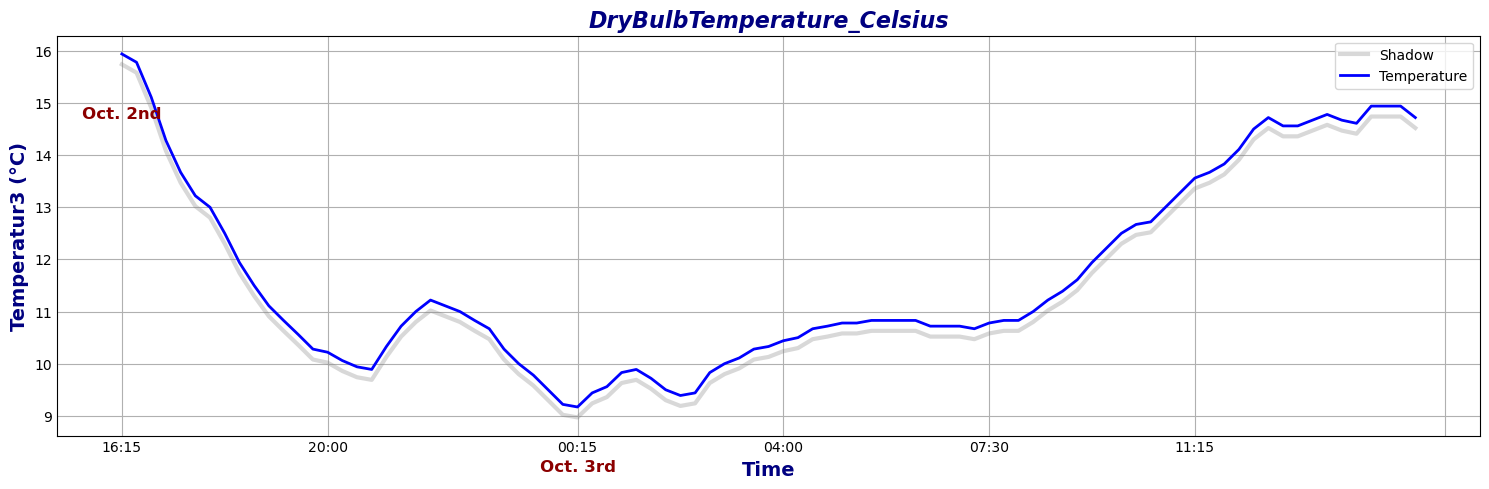

In [317]:
fig, axs = plt.subplots(figsize=(15,5))

axs.plot(weather_info['time'], weather_info['temp'] - 0.2, color="gray", linewidth=3, alpha=0.3, label="Shadow") # plots a shadow under the main line.

# Plotting the main line
axs.plot(weather_info['time'], weather_info['temp'], color="blue", linewidth=2, label="Temperature")

# Set title and x-axis formatting
axs.set_title("DryBulbTemperature_Celsius", fontsize=16, fontweight="bold", fontstyle="italic", color="navy")
axs.set_xlabel("Time", fontsize=14, fontweight="bold", color="navy")
axs.set_ylabel("Temperatur3 (°C)", fontsize=14, fontweight="bold", color="navy")

axs.xaxis.set_major_locator(mdates.AutoDateLocator())

# Get the first x and y values to add the date.
first_x = weather_info['time'].iloc[0]
first_y = weather_info['temp'].iloc[0]
axs.text(first_x, first_y - 1, "Oct. 2nd", ha='center', va='top', color="darkred", fontsize=12, fontweight='bold')
# Get the next x and y values when the date changes.
next_x = weather_info['time'].iloc[31]
next_y = weather_info['temp'].iloc[31]
axs.text(next_x, next_y - 1, "Oct. 3rd", ha='center', va='top', color="darkred", fontsize=12, fontweight='bold')
axs.legend()
plt.tight_layout()

plt.show()

#### Plotting data - Version 2

#### Dividing further into two subsets, one for each given day.

In [273]:
# Creating to sets of data based on the date.
october_second = weather_info[weather_info["date"] == "2024/10/02"]
october_third = weather_info[weather_info["date"] == "2024/10/03"]
temp = weather_info['temp']

In [274]:
october_second.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, 0 to 29
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    30 non-null     object 
 1   time    30 non-null     object 
 2   temp    30 non-null     float64
dtypes: float64(1), object(2)
memory usage: 960.0+ bytes


In [275]:
october_third.info()

<class 'pandas.core.frame.DataFrame'>
Index: 59 entries, 30 to 88
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    59 non-null     object 
 1   time    59 non-null     object 
 2   temp    59 non-null     float64
dtypes: float64(1), object(2)
memory usage: 1.8+ KB


##### Plotting data using the 2 new datasets created and Vertically stacked Subplots.

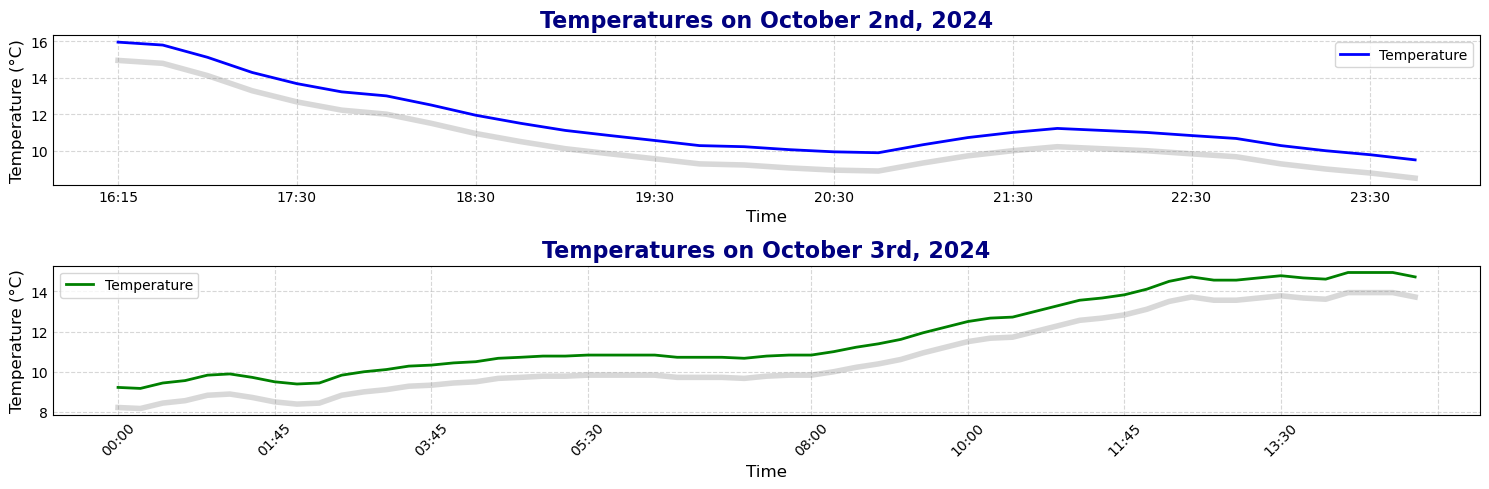

In [313]:


fig, axs = plt.subplots(2, figsize=(15,5))

# Plot for October 2nd
axs[0].plot(october_second['time'], october_second['temp'], color='blue', linewidth=2, label='Temperature')
axs[0].plot(october_second['time'], october_second['temp'] - 1, color='gray', linewidth=4, alpha=0.3)  # Shadow
axs[0].set_title("Temperatures on October 2nd, 2024", fontsize=16, fontweight='bold', color='navy')
axs[0].set_xlabel("Time", fontsize=12)
axs[0].set_ylabel("Temperature (°C)", fontsize=12)
axs[0].xaxis.set_major_locator(mdates.AutoDateLocator())
axs[0].grid(True, linestyle='--', alpha=0.5)  # Add grid for better readability
axs[0].legend()

# Plot for October 3rd
axs[1].plot(october_third['time'], october_third['temp'], color='green', linewidth=2, label='Temperature')
axs[1].plot(october_third['time'], october_third['temp'] - 1, color='gray', linewidth=4, alpha=0.3)  # Shadow
axs[1].set_title("Temperatures on October 3rd, 2024", fontsize=16, fontweight='bold', color='navy')
axs[1].set_xlabel("Time", fontsize=12)
axs[1].set_ylabel("Temperature (°C)", fontsize=12)
axs[1].xaxis.set_major_locator(mdates.AutoDateLocator())
axs[1].grid(True, linestyle='--', alpha=0.5)  # Add grid for better readability
axs[1].legend()

# Rotate x-axis labels for clarity
plt.xticks(rotation=45)
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

#### References:

https://matplotlib.org/stable/api/markers_api.html

_Date and time formating_

https://saturncloud.io/blog/how-to-change-datetime-format-in-pandas/#:~:text=To%20change%20the%20datetime%20format%20in%20Pandas%2C%20you%20first%20need,data%20in%20the%20desired%20format.


https://www.geeksforgeeks.org/plot-multiple-plots-in-matplotlib/

https://matplotlib.org/stable/gallery/subplots_axes_and_figures/subplots_demo.html
